# PROJECT1

# Τσολάκος Θεόδωρος 1115201600183
# Βιρβιδάκη Χρυσούλα 1115201600021

# PART1

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import folium
from os import path
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns; sns.set()

# Δημιουργία αρχείου train.csv

In [131]:
#Αρχικά δημιουργούμε έναν εννιαίο πίνακα με τα δεδομένα από όλους τους μήνες. Ο πίνακας αυτός θα έχει τις στήλες που ζητήθηκαν
# + 1 ακόμα στήλη 'month'.
# Για κωδικούς δωματίων που υπάρχουν σε πάνω από έναν μήνα θα δημιουργούνται
#αντίστοιχα ανάλογος αριθμός γραμμών στον πίνακα που θα ανφέρονται στο συγκεκριμένο δωμάτιο.
#Εκτυπώνουμε τον τελικό πίνακα στον οποίο φαίνονται ο αριθμός των στηλών και των γραμμών του.

In [132]:
# Βάζουμε σε σχόλια το παρακάτω κώδικα δημιουργίας του train.csv αρχείου γιατί χρησιμοποιούμε δικά μας paths.

In [133]:
#Location1 = r'C:\Users\chrysa\Documents\TEDedomenwn\data\data\febrouary\listings.csv'
#df1 = pd.read_csv(Location1, usecols=['id', 'zipcode','transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights'])
#df1['month'] = 'February'

#Location2 = r'C:\Users\chrysa\Documents\TEDedomenwn\data\data\march\listings.csv'
#df2 = pd.read_csv(Location2, usecols=['id', 'zipcode','transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights'])
#df2['month'] = 'March'

#Location3 = r'C:\Users\chrysa\Documents\TEDedomenwn\data\data\april\listings.csv'
#df3 = pd.read_csv(Location3, usecols=['id', 'zipcode','transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews', 'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable', 'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic', 'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms', 'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365', 'minimum_nights'])
#df3['month'] = 'April'

#df = pd.concat([df1, df2, df3])
#df.to_csv('train.csv',index=False)


# 1.Ποιός είναι ο πιο συχνός τύπος  room_type για τα δεδομένα σας ; 

In [134]:
#Για το παρακάτω ερώτημα παραθέτουμε έναν πίνακα με τους διαφορετικούς τύπους δωματίων και με τον συνολικό αριθμό καταχωρήσεων
#δωματίων για τον κάθε έναν
#Ακόμα δείχνουμε και με ιστόγραμμα τη διαφορά των τιμών των καταχωρήσεων για τα διαφορετικά αυτά ε΄ίδη δωματίων.

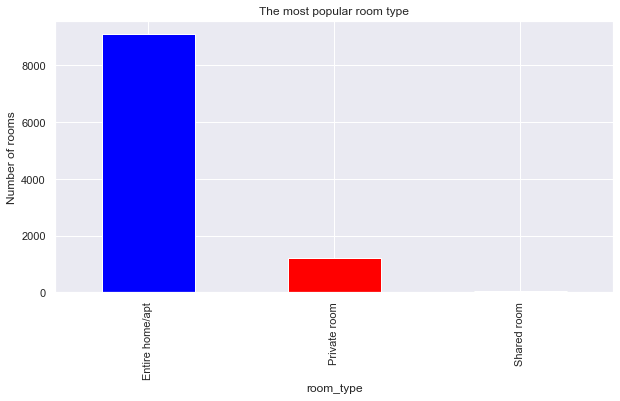

In [135]:
one = df.loc[:, ['id', 'room_type']]
one = one.drop_duplicates()
one = one.groupby('room_type').count()
one['id'].plot.bar(color=['blue', 'red','green'],figsize=(10, 5));plt.title('The most popular room type')
plt.ylabel("Number of rooms")

plt.show()

# 2. Φτιάξτε γράφημα ή γραφήματα που δείχνουν την πορεία των τιμών για το διάστημα των 3 μηνών

In [136]:
#Για το παρακάτω ερώτημα παραθέτουμε αρχικά έναν πίνακα που δείχνει τη μέση τιμή των δωματίων για κάθε έναν από τους τρεις μήνες
# Έπειτα δείχνουμε με τη βοήθεια γραφικής παράστασης την πορεία των τιμών αυτούς τους τρεις μήνες.

month
April       60.992128
February    61.169527
March       60.890398
Name: price, dtype: float64

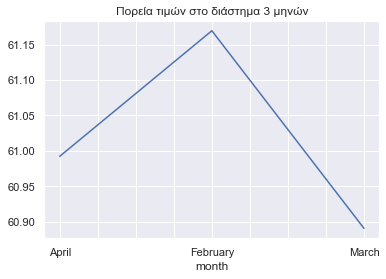

In [137]:
two = df.loc[:, [ 'price','month']]
two['price'] = two['price'].str[1:]
two['price']=pd.to_numeric(two['price'], errors='coerce')
two

result = two.groupby('month')['price'].mean()
result.plot();plt.title('Πορεία τιμών στο διάστημα 3 μηνών')
result



# 3. Ποιές είναι οι 5 πρώτες γειτονιές με τις περισσότερες κριτικές;

In [138]:
#Για το παρακάτω ερώτημα παραθέτουμε έναν πίνακα που δείχνει τις 5 περιοχές με τις περισσότερες κριτικές 
#και δίπλα τον αριθμό των κριτικών για κάθε μία από αυτές.

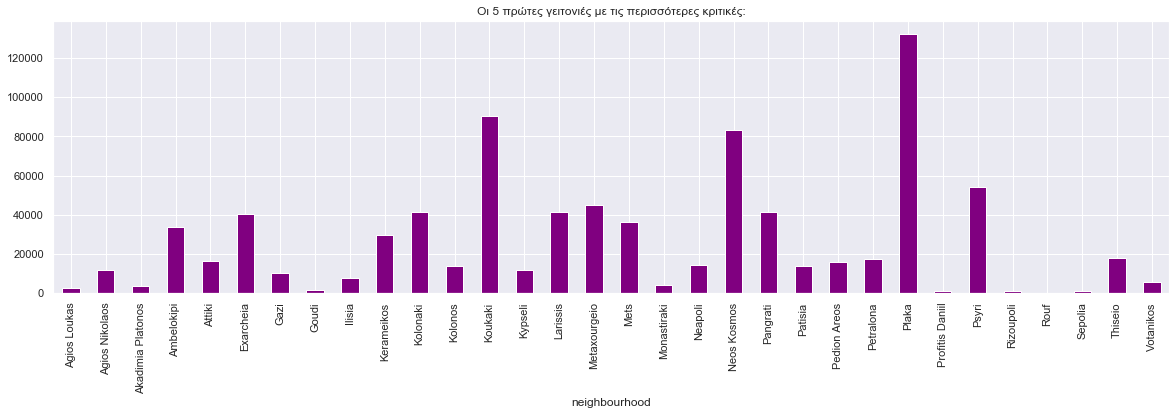

neighbourhood
Plaka           132361
Koukaki          90357
Neos Kosmos      83348
Psyri            54353
Metaxourgeio     44792
Name: number_of_reviews, dtype: int64

In [139]:
three = df.loc[:, ['neighbourhood', 'number_of_reviews']]
result = three.groupby('neighbourhood').sum()
res = result['number_of_reviews']

res.plot.bar(color=['purple'], figsize=(20, 5));plt.title('Οι 5 πρώτες γειτονιές με τις περισσότερες κριτικές:')
plt.show()
res.sort_values(ascending=False).head(5)

# 4. Ποιά είναι η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων; 

In [140]:
#Για το παρακάτω ερώτημα παρατηρήθηκε ότι υπήραν καταχωρήσεις δωματίων που ενώ τον ένα μήνα είχαν καταχωρηθεί για μια περιοχή Α
#τον άλλον μήνα καταχωρούνταν για μια περιοχή Β. Σε τέτοιες περιπτώσεις, από την σιτγμή που στο συγκεκριμένο ερώτημα
#μας απασχολούν οι περιοχές και η ύπαρξη καταχωρήσεων δωματίων σε αυτές συμπεριλάβαμε όλες τις περιοχές
#στις οποίες βρέθηκε να έχει καταχωρηθεί το κάθε δωμάτιο.
# με τη βοήθεια γραφήματος της πίτας δείχνουμε τη διαφορά των καταχωρήσεων από περιοχή σε περιοχή, ενώ παρατηρούμε ότι στην Πλάκα
# έχουμε τις περισσότερες.

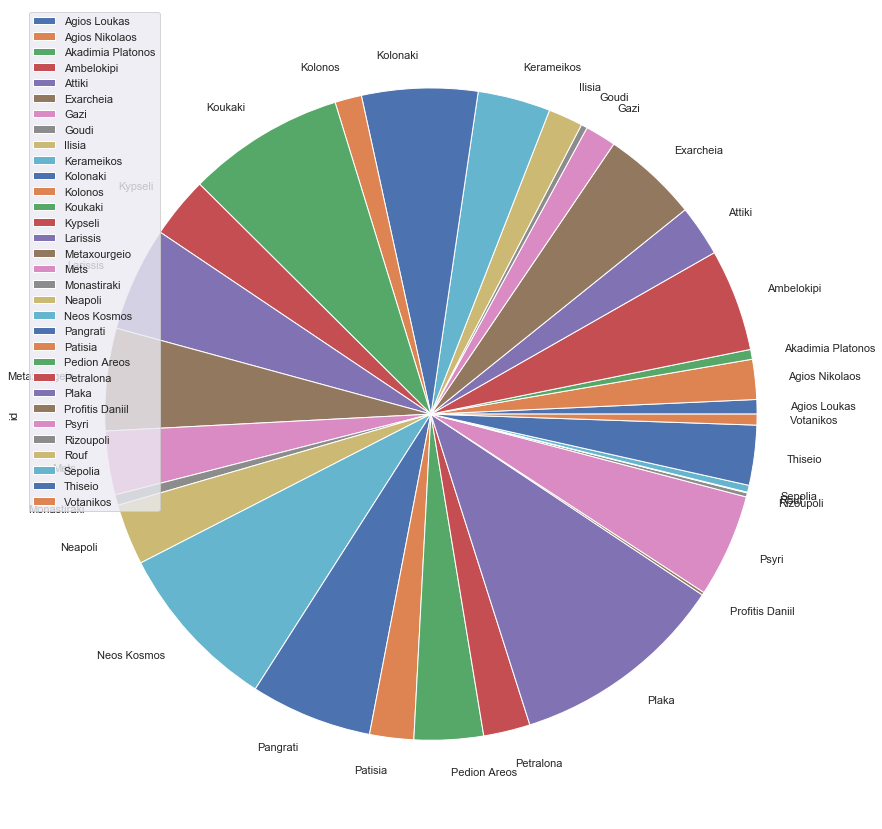

Η γειτονία με τις περισσότερες καταχωρήσεις είναι: 


id
neighbourhood      
Plaka          1216

In [141]:
four = df.loc[:, ['neighbourhood', 'id']]
#four1 = four.drop_duplicates('id') #1131
four1 = four.drop_duplicates()    #1216

result = four1.groupby('neighbourhood').count()
res=result

result.plot.pie(y='id', figsize=(20, 15))
plt.show()

print('Η γειτονία με τις περισσότερες καταχωρήσεις είναι: ')
result.sort_values(by='id', ascending=False).head(1)



# 5. Πόσες είναι οι καταχωρήσεις ανά γειτονιά και ανά μήνα;

In [142]:
#Για το ερώτημα αυτό αρχικά παραθέτουμε τον πίνακα με το άθροισμα των καταχωρήσεων για την κάθε περιοχή τον κάθε μήνα ξεχωριστά.
#Έπειτα παραθέτουμε τρία διαγράμματα που δείχνουν την διακύμανση των καταχωρήσεων ανά περιοχή ξεχωριστά για τον κάθε μήνα.

id
neighbourhood  month        
Agios Loukas   April      71
               February   68
               March      70
Agios Nikolaos April     209
               February  196
...                      ...
Thiseio        February  314
               March      94
Votanikos      April      59
               February   50
               March      54

[96 rows x 1 columns]

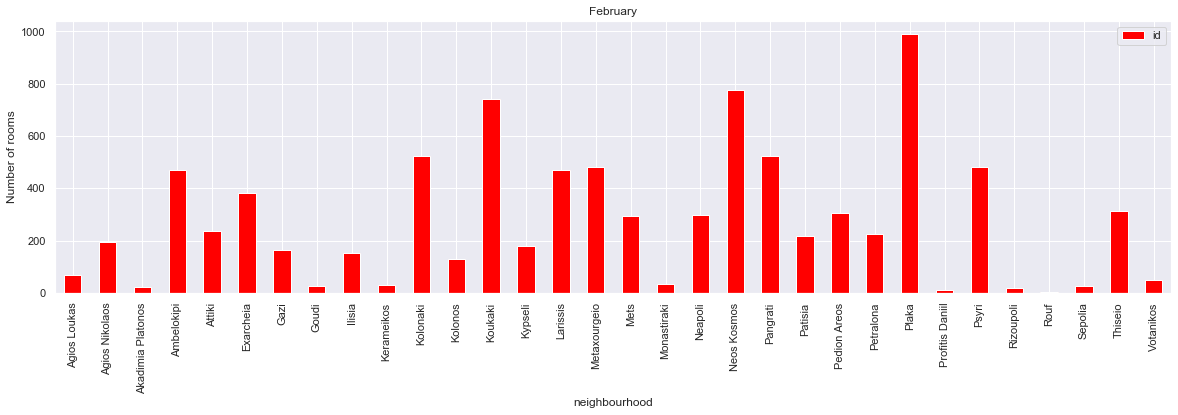

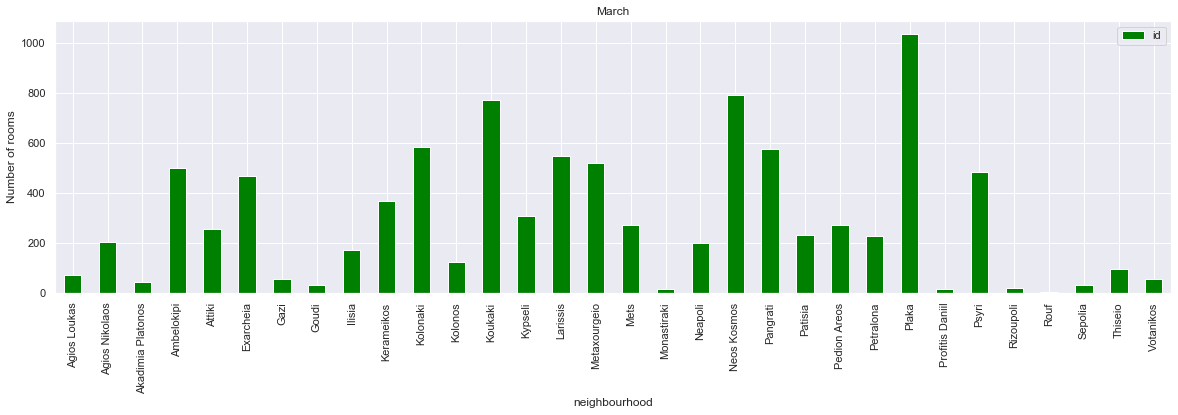

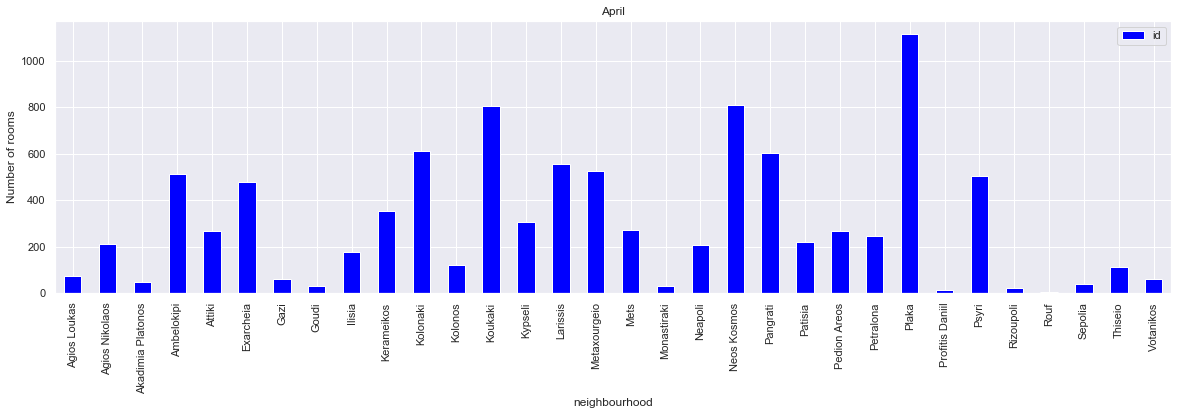

In [143]:
five = df.loc[:, ['neighbourhood', 'id','month']]
result = five.groupby(['neighbourhood','month']).count()


res1 = five.query('month == ["February"]')
res1 = res1.loc[:, ['neighbourhood', 'id']]
res1 = res1.groupby(['neighbourhood']).count().plot.bar(figsize=(20, 5), color=[ 'red']);plt.title('February')
plt.ylabel("Number of rooms")

res2 = five.query('month == ["March"]')
res2 = res2.loc[:, ['neighbourhood', 'id']]
res2 = res2.groupby(['neighbourhood']).count().plot.bar(color=['green'],figsize=(20, 5));plt.title('March')
plt.ylabel("Number of rooms")

res3 = five.query('month == ["April"]')
res3 = res3.loc[:, ['neighbourhood', 'id']]
res3 = res3.groupby(['neighbourhood']).count().plot.bar(figsize=(20, 5), color=[ 'blue']);plt.title('April')
plt.ylabel("Number of rooms")

result

# 6. Σχεδιάστε το ιστόγραμμα της μεταβλητής neighborhood

In [144]:
#Για το παρακάτω ερώτημα χρειάστηκε να υπολογίσουμε το άθροισμα των καταχωρήσεων που είχε κάθε περιοχή, λαμβάνοντας φυσικά υπόψη
# μία φορά την καταχώρηση ενός σπιτιού-δωματίου σε μία περιοχή.

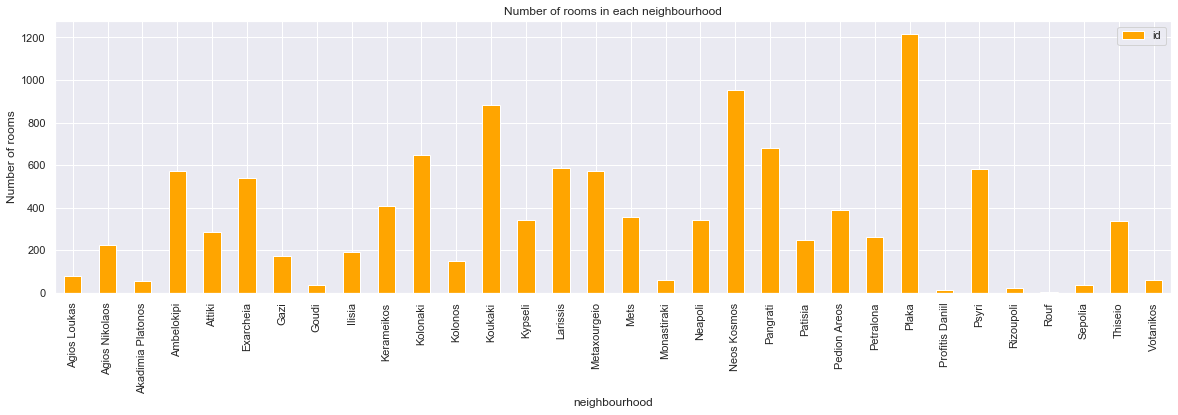

In [145]:
six = df.loc[:, ['neighbourhood', 'id']]
six = six.drop_duplicates()

result=six.groupby(['neighbourhood']).count().plot.bar(figsize=(20, 5),color=['orange'])
plt.ylabel("Number of rooms")
plt.title('Number of rooms in each neighbourhood')
plt.show()

# 7. Ποιος είναι ο πιο συχνός τύπος δωματίου (room_type) σε κάθε γειτονιά (neighborhood);

In [146]:
# Για το παρακάτω ερώτημα παραθέτουμε έναν πίνακα που δείχνει για κάθε μία περιοχή το είδος δωματίου με τον μεγαλύτερο αριθμό 
# καταχωρήσεων καθώς και το αριθμό των καταχωρήσεων αυτών.
# Ακόμα δείχνουμε με τρία διαγράμματα για κάθε είδος δωματίου τον αριθμό των καταχωρήσεων σε όλες τις περιοχές για αυτό το είδος
#Εύκολα μπορούμε να δούμε ότι ο τύπος 'Entire home/apt' είναι αυτός με τις περισσότερες καταχωρήσεις σε όλες τις περιοχές.

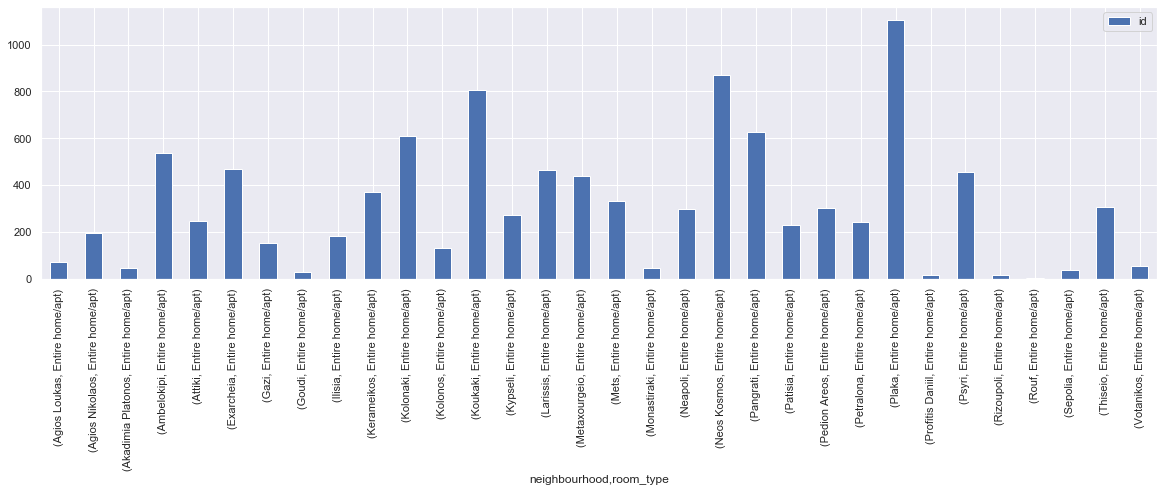

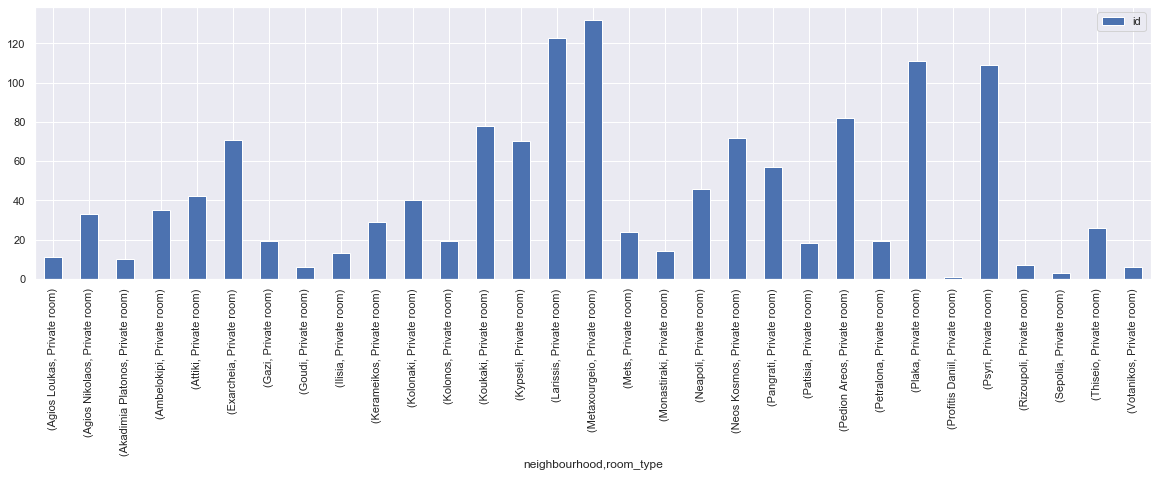

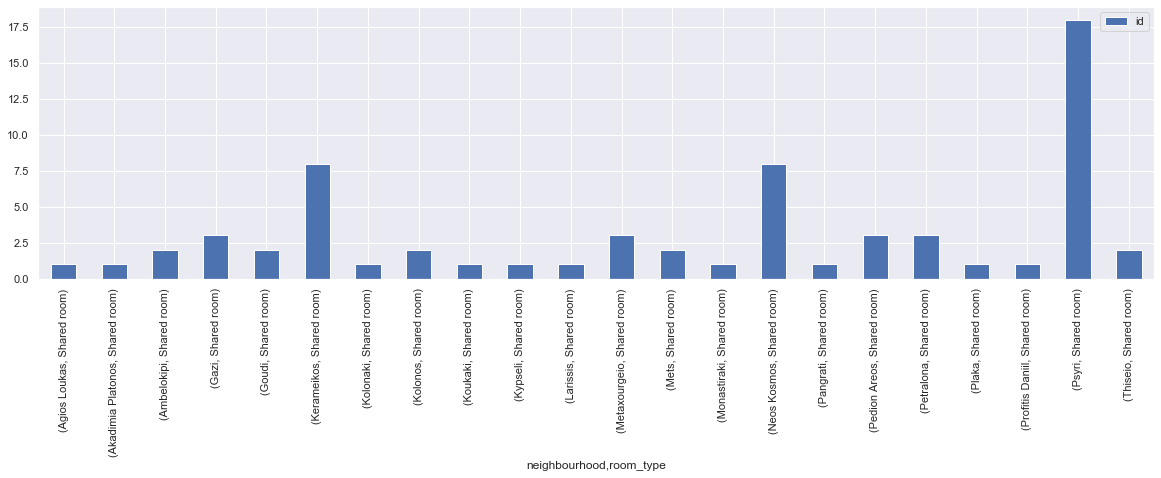

Σε όλες τις περιοχές βλέπουμε ότι οι περισσότερες καταχωρήσεις είναι στην κατηγορία: Entire home/apt


id
neighbourhood     room_type            
Agios Loukas      Entire home/apt    69
Agios Nikolaos    Entire home/apt   193
Akadimia Platonos Entire home/apt    45
Ambelokipi        Entire home/apt   536
Attiki            Entire home/apt   247
Exarcheia         Entire home/apt   467
Gazi              Entire home/apt   153
Goudi             Entire home/apt    27
Ilisia            Entire home/apt   181
Kerameikos        Entire home/apt   371
Kolonaki          Entire home/apt   610
Kolonos           Entire home/apt   129
Koukaki           Entire home/apt   804
Kypseli           Entire home/apt   273
Larissis          Entire home/apt   466
Metaxourgeio      Entire home/apt   439
Mets              Entire home/apt   332
Monastiraki       Entire home/apt    45
Neapoli           Entire home/apt   297
Neos Kosmos       Entire home/apt   872
Pangrati          Entire home/apt   626
Patisia           Entire home/apt   229
Pedion Areos      Entire home/apt   303
Petralona         Entire home/apt   240
Plaka             Entire home/apt  1106
Profitis Daniil   Entire home/apt    14
Psyri             Entire home/apt   454
Rizoupoli         Entire home/apt    16
Rouf              Entire home/apt     4
Sepolia           Entire home/apt    36
Thiseio           Entire home/apt   308
Votanikos         Entire home/apt    55

In [147]:
neighb = df.drop_duplicates('neighbourhood')
seven = df.loc[:, ['neighbourhood', 'id', 'room_type']]
seven = seven.drop_duplicates()

result=seven.groupby(['neighbourhood','room_type']).count()
res = result
result.groupby(['room_type']).plot.bar(figsize=(20,5))
plt.show()
print('Σε όλες τις περιοχές βλέπουμε ότι οι περισσότερες καταχωρήσεις είναι στην κατηγορία: Entire home/apt')
res.groupby(['neighbourhood']).head(1)




# 8. Ποιός είναι ο πιο ακριβός τύπος δωματίου;

In [148]:
# Για το παρακάτω ερώτημα παραθέτουμε έναν πίνακα στον οποίο φαίνεται για κάθε είδος δωματίου ποιός είναι ο μέσος όρος των τιμών
# για τα αντίστοιχα δωμάτια. Με γράφημα δείχνουμε την πορεία των τιμών για τους τύπους δωματίων.
# Όπως βλέπουμε ο πιο ακριβός τύπος δωματίου είναι ο Entire home/apt .

                      price
room_type                  
Entire home/apt  187.911348
Private room     136.836879
Shared room       55.625000


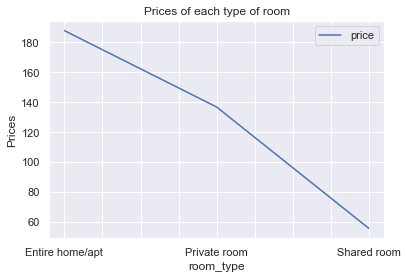

In [149]:
eight= df.loc[:, ['price', 'room_type']]
eight = eight.drop_duplicates()
eight['price']=eight['price'].str[1:]
eight['price']=pd.to_numeric(eight['price'], errors='coerce')
result = eight.groupby(['room_type']).mean()
print(result)
result.plot()
plt.ylabel("Prices")
plt.title('Prices of each type of room')

plt.show()



# 9. Χρησιμοποιήστε τη βιβλιοθήκη  Folium Map με τις στήλες latitude/longitude και εμφανίστε σε ένα χάρτη για ένα μήνα

In [150]:
#Για το παρακάτω ερώτημα παραθέτουμε μια φωτογραφία στην οποία αναπαριστάται ένας χάρτης με τις τοποθεσίες 500 στο πλήθος
#ενδεικτικών δωματίων που είχαν καταχωρηθεί τον μήνα Φεβρουάριο.
#Για κάθε ένα από τα δωμάτια αυτά όταν επιλεγεί εμφανίζονται οι ακόλουθες πληροφορίες: κωδικός δωματίου, αριθμός κρεβατιών,
#είδος δωματίου, πλήθος παροχών που διαθέτει και τιμή.
#Ακόμα ανάλογα με την τιμή του δωματίου η πινέζα παίρνει κατάλληλο χρώμα για τον εύκολο διαχωρισμό τους.
#Πράσινο χρώμα έχουν τα δωμάτια που κοστίζουν έως και 50 ευρώ, πορτοκαλί τα δωμάτια που κοστίζουν από 50 έως 100 ευρώ
#και κόκκινο χρώμα έχουν τα δωμάτια πουκοστίζουν πάνω από 100 ευρώ το βράδυ.
#Αν θέλετε μπορείτε να ξεσχολιάσετε την γραμμή που είναι σχολιασμένη προκειμένου να δείτε τον χάρτη όπως εμφανίζεται ολόκληρος.

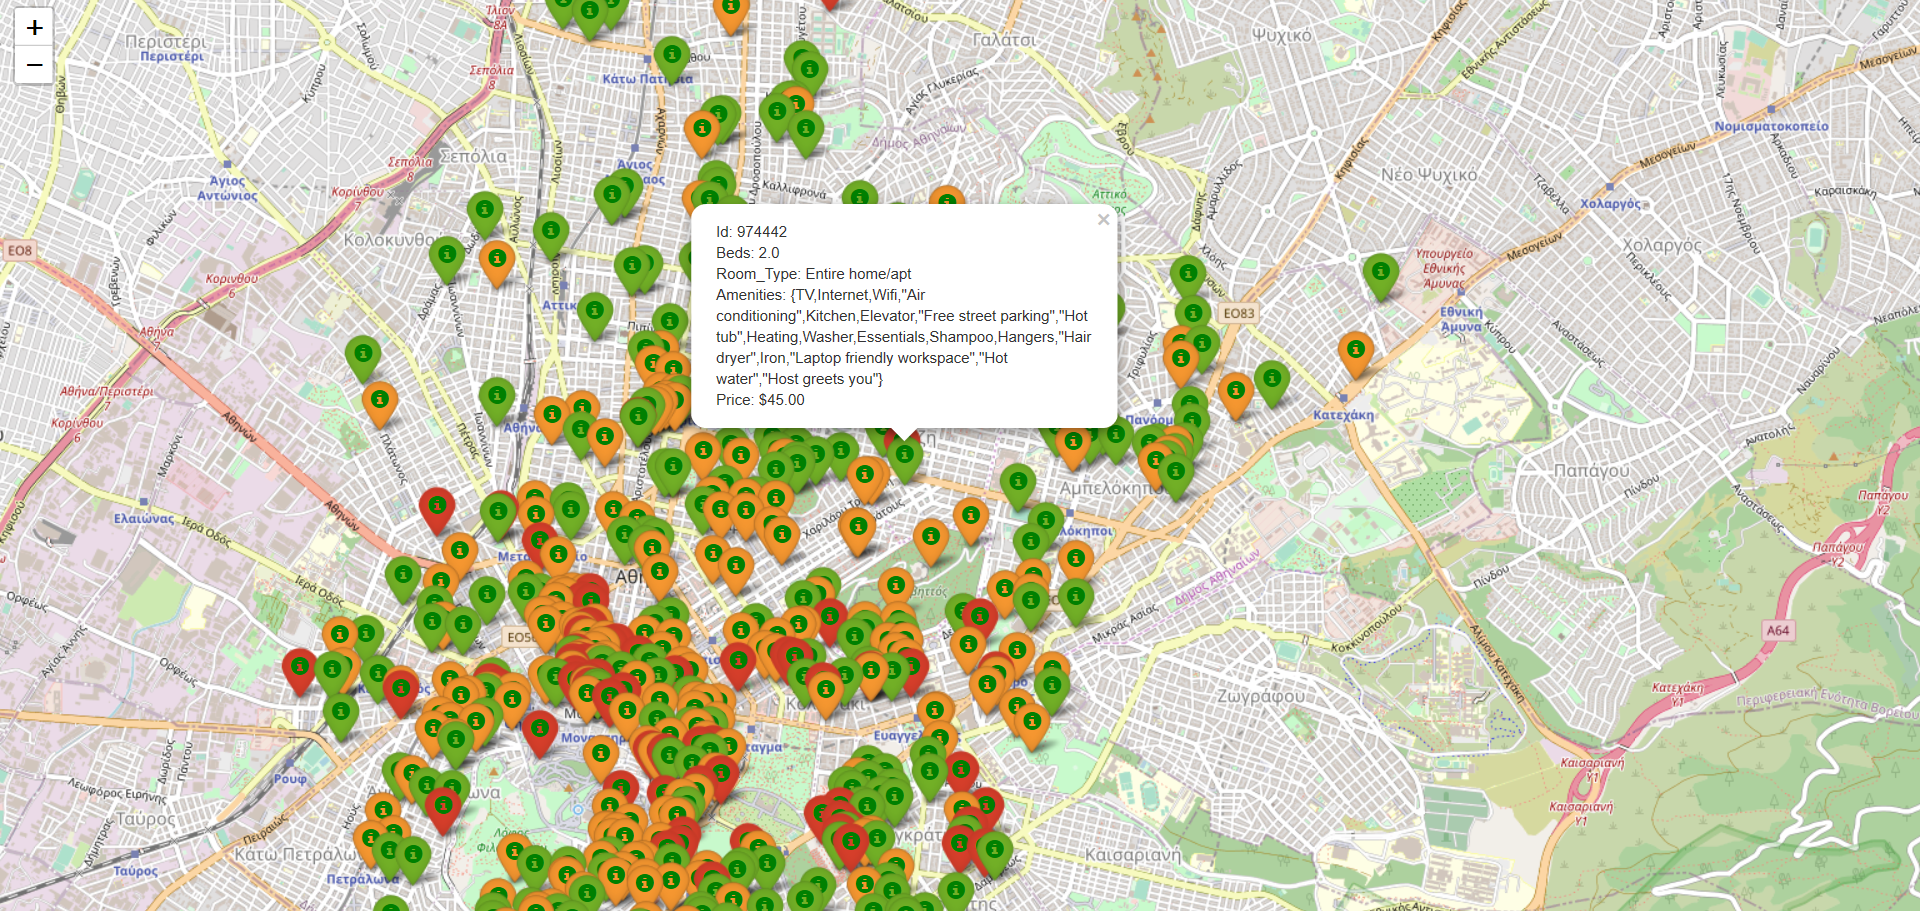

In [151]:
nine = df[:500]
nine

def color(price):
   
    price=price[1:]
    price=pd.to_numeric(price, errors='coerce')
    if price  < 50:
        col='green'
    elif price in range(50,100):
        col='orange'
    else:
        col='red'
    return col

m = folium.Map(location=[37.99,23.75], zoom_start=13.5)

for Id,beds, room_type,amenities,price,latitude, longitude in zip(nine['id'], nine['beds'], nine['room_type'],nine['amenities'], nine['price'], nine['latitude'], nine['longitude']):
    folium.Marker([latitude, longitude], 
                  popup=folium.Popup('Id: ' + str(Id) + '<br>'
                        'Beds: ' + str(beds) + '<br>'
                        'Room_Type: ' + str(room_type) + '<br>'
                        'Amenities: ' + str(amenities)+ '<br>'
                        'Price: ' + str(price), max_width=300),
                  icon=folium.Icon(color=color(price),icon_color='green')
                 ).add_to(m)

    
#m.save('map1.html')

Image(filename = r"mymap.png",width=1000,height=1000)

# 10. Φτιάξτε διαφορετικά wordclouds με τα δεδομένα από τη στήλη neighbourhood, transit, description, last_review. 

In [152]:
# Για το παρακάτω ερώτημα παραθέτουμε 4 workclouds με τα δεδομένα από τις στήλες που ζητήθηκαν. Χρησιμοποιήθηκαν ενδεικτικά
# δεδομένα από τις πρώτες 1000 καταχωρήσεις δωματίων. Για το τελευταίο workcloud με βάση τη στήλη last_review χρειάστηκε
# να πάρουμε δεδομένα από το αρχείο reviews.csv και να τα συσχετήσουμε με αυτά που είχαμε από το αρχείο train.csv.

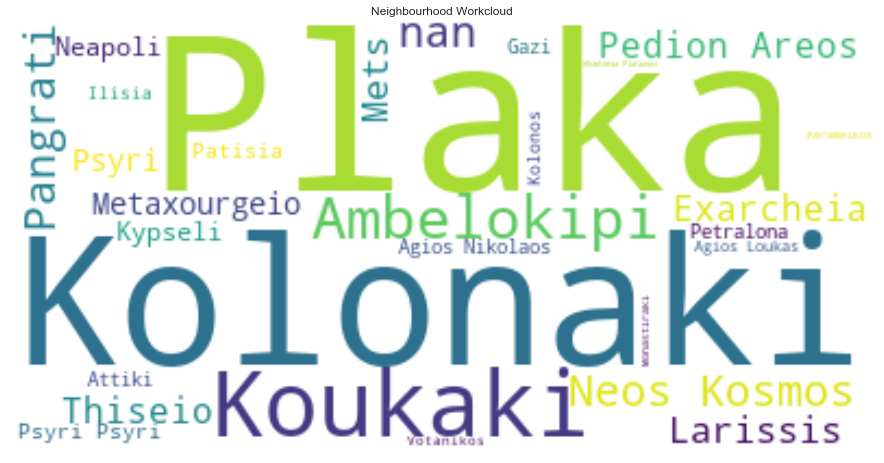

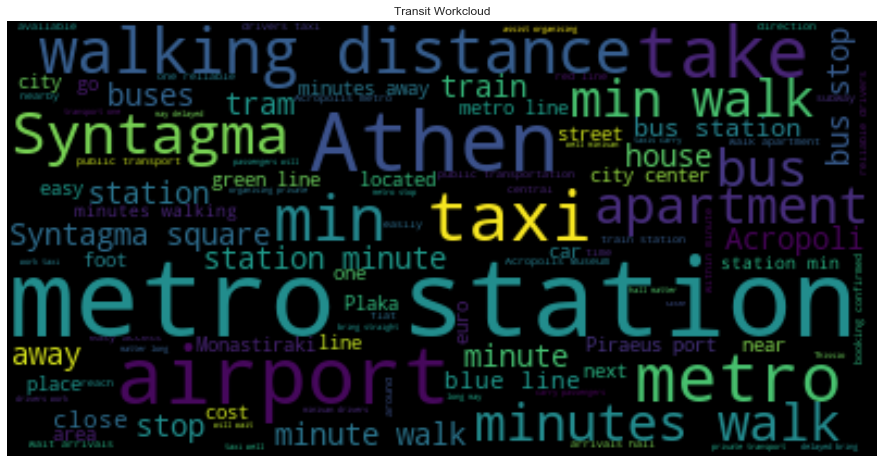

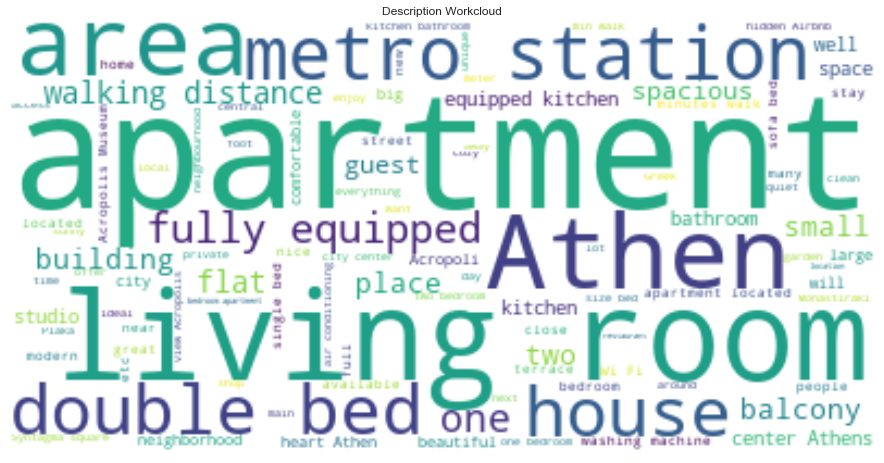

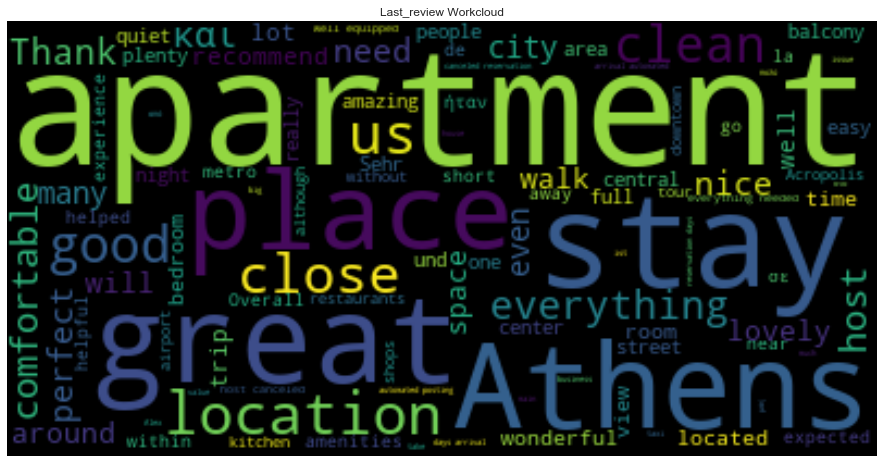

In [153]:
ten = df[:1000]
text1 = text2= text3 = text4 = ''
for neighb, transit, descr in zip(ten['neighbourhood'], ten['transit'],ten['description']):
    text1 = text1 + str(neighb) + " "
    text2 = text2 + str(transit)
    text3 = text3 + str(descr)

wordcloud1 = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text1)

plt.figure(figsize=[18,8])
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Neighbourhood Workcloud")
plt.show()


wordcloud2 = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(text2)

plt.figure(figsize=[18,8])
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Transit Workcloud")
plt.show()

wordcloud3 = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text3)

plt.figure(figsize=[18,8])
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.title("Description Workcloud")
plt.show()

# Στο σημείο αυτό και πάλι χρησιμοποιύμε δικό μας path για το reviews.csv αρχείο
Location = r'C:\Users\chrysa\Documents\TEDedomenwn\data\data\febrouary\reviews.csv'
Rev = pd.read_csv(Location, usecols=['listing_id','date','comments'])
Rev = Rev[:5000]

for Id,lastrev in zip(ten['id'], ten['last_review']):
    for Lid, date, coms in zip(Rev['listing_id'], Rev['date'], Rev['comments']):
        if((str(lastrev) == str(date)) & (str(Id) == str(Lid) )):
            text4 = text4 + coms

wordcloud4 = WordCloud(max_font_size=100, max_words=100, background_color="black").generate(text4)

plt.figure(figsize=[18,8])
plt.imshow(wordcloud4, interpolation="bilinear")
plt.axis("off")
plt.title("Last_review Workcloud")
plt.show()

# 12. Ποιά άλλη πληροφορία θα μπορούσατε να εξάγετε από τα δεδομένα αυτά; 

In [154]:
# Για το πρώτο μέρος του ερωτήματος 12 αποφασίσαμε να παρουσιάσουμε πληροφορίες για την περιοχή της Πλάκας.
# Συγκεκριμένα δείχνουμε πόσες καταχωρήσεις δωματίων υπάρχουν για την περιοχή αυτή για κάθε τύπο (πλην του είδους Apartment).
# Έτσι παραθέτουμε έναν πίνακα που δείχνει πόσες καταχωρήσεις υπάρχουν για τους υπόλοιπους τύπους ιδιοκτησίας σε αυτη τη περιοχή
# Και οπτικοποιούμε την πληροφορία με τη βοήθεια του γραφήματος της πίτας.

                    id
property_type         
Aparthotel          13
Bed and breakfast   14
Boat                 1
Boutique hotel      19
Condominium         14
Earth house          3
Guesthouse           5
Hostel               1
Hotel               17
House               51
Loft                45
Other               16
Resort               3
Serviced apartment  12
Townhouse            5
Villa                4


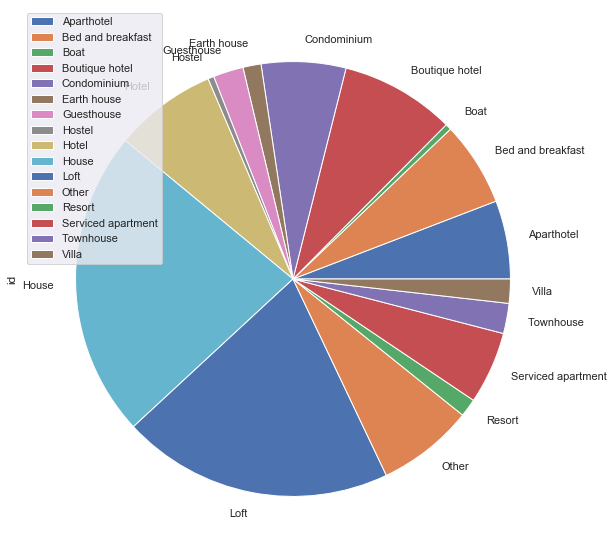

In [155]:
#12α 
part1 = df.query('neighbourhood == ["Plaka"]')
part1 = part1.query('property_type != ["Apartment"]')
part1 = part1.loc[:, ['property_type','id']]
part1 = part1.drop_duplicates()

result = part1.groupby(['property_type']).count()
print(result)

result.plot.pie(y='id',figsize=(10,10))
plt.show()

In [156]:
# Για το παρακάτω ερώτημα παρουσιάζουμε το πλήθος των δωματίων ανά περιοχή που πληρούν κάποιες συνηθισμένες απαιτήσεις πελατών.
# Αυτές είναι να μπορούν να φιλοξενηθούν τουλάχιστον 3 άτομα, να υπάρχουν τουλάχιστον 2 μπάνια και να μην κοστίζει πάνω από
# 50 ευρώ το βράδυ. Συνεπώς παραθέτουμε ένα γράφημα στο οποίο φαίνεται σε ποιές περιοχές υπάρχει μεγάλο πλήθος από τέτοιες
# καταχωρήσεις δωματίων και σε ποιές περιοχές δεν υπάρχουν πολλές.

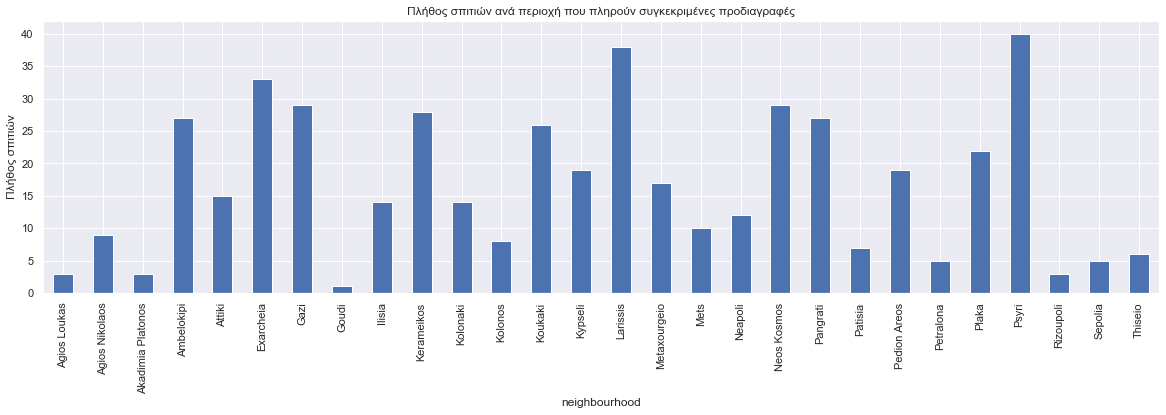

In [157]:
#12β
part2= df.loc[:, ['price', 'bathrooms','accommodates', 'id', 'neighbourhood']]
part2 = part2.drop_duplicates()
part2['price']=part2['price'].str[1:]
part2['price']=pd.to_numeric(part2['price'], errors='coerce')
part2
part2 = part2.query('accommodates >= 3')
part2 = part2.query('bathrooms > 1')
part2 = part2.query('price < 50')
part2
result = part2.groupby('neighbourhood')['id'].count().plot.bar(figsize=(20, 5));plt.title('Πλήθος σπιτιών ανά περιοχή που πληρούν συγκεκριμένες προδιαγραφές')
plt.ylabel("Πλήθος σπιτιών")
plt.show()

# PART3

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import matplotlib
import folium
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns; sns.set()

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string

# Αφαίρεση των stop words, πειραματισμός με τις παραμέτρους του wordcloud

In [159]:
# Για το ερώτημα αυτό ορίζουμε αρχικά τα stop_words να είναι οι λέξεις της αγγλικής και της ελληνικής γλώσσας.
# Φιλτράρουμε την στήλη με τις περιγραφές ώστε να μην περιέχουν αυτές τις λέξεις.
# Φτιάχνουμε το wordcloud χρησιμοποιώντας το σχήμα της εικόνας ενός σπιτιού και με τη βοήθεια ορισμένων παραμέτρων παίρνει την
# τελική μορφή που παρουσιάζουμε.

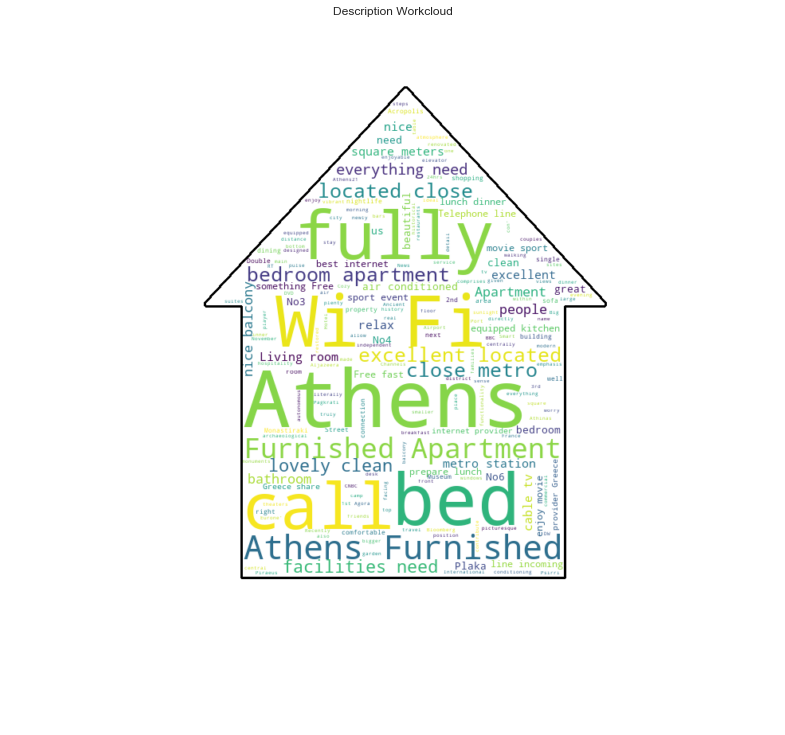

In [160]:
stop_words = set(stopwords.words('english') + stopwords.words('greek')) 

text = df['description'].values
word_tokens = word_tokenize(str(text)) 

filtered_text = ' '
for w in word_tokens:
    if not w in stop_words:
        filtered_text = filtered_text + str(w) + ' '
  
d = path.dirname(_file_) if "_file_" in locals() else os.getcwd()
masky = np.array(Image.open(path.join(d, "house.png")))

wordcloud = WordCloud(stopwords=stop_words,mask = masky, max_font_size=100,contour_color='black',contour_width=3, max_words=800, background_color="white").generate(filtered_text)

plt.figure(figsize=[20,13])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Description Workcloud")
plt.show()

#  Δημιουργία νέας στήλης με την ένωση των στηλών name και description

In [161]:
# Στον παρακάτω κώδικα δημιουρούμε μία νέα στήλη με την ένωση των δύο στηλών που ζητήθηκε και αντικαθιστούμε με NULL όπου
# το πεδίο κάποιας γραμμής ε΄ίχε NA.
# Στην συνέχεια φιλτράρουμε την νέα αυτή στήλη ώστε να μην έχει σημεία στήξης. Αποθηκεύουμε τον νέο πίνακα με την επιπλέον
# στήλη σε ένα αρχείο part3.csv

In [162]:
df3 = df.loc[:,['id', 'name', 'description']]
df3 = df3.drop_duplicates('id')

df3['name'].fillna('NULL', inplace=True)
df3['description'].fillna('NULL', inplace=True)

df3['NameDesc'] = df3['name'] +str(' ') + df3['description']

table = str.maketrans(dict.fromkeys(string.punctuation))
df3['NameDesc'] = df3['NameDesc'].astype(str)
df3['NameDesc'] = df3['NameDesc'].apply(lambda x: x.translate(table))


df3.to_csv('part3.csv',index=False)

# 1. Δημιουργήστε τον TF-IDF πίνακα των unigrams και των bigrams για τη νέα στήλη. 

In [163]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import csv
from nltk.tokenize import RegexpTokenizer
import pickle

In [164]:
# Για το ερώτημα αυτό παίρνουμε το αρχείο που δημηιουργήσαμε προηγουμένως, βγάζουμε τα διπλότυπα id και εφαρμόζουμε τις
# κατάλληλες συναρτήσεις ώστε να δημιουργηθεί ο πίνακας TF-IDF.
# Έπειτα τον πίνακα αυτό τον αποθηκεύουμε στο αρχείο tf_idf.csv, το οποίο σας έχουμε στείλει για να μπορέσετε
# να δείτε τη μορφή του ολοκληρωμένη επειδή δεν φαίνεται από την παρακάτω εκτύπωση.

In [165]:
newdf = pd.read_csv('part3.csv', usecols=['id', 'name', 'description','NameDesc'])
newdf = newdf.drop_duplicates('id')


from sklearn.feature_extraction.text import CountVectorizer

corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',]

>>> vectorizer = CountVectorizer()

>>> X = vectorizer.fit_transform(corpus)

>>> print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

>>> print(X.toarray())


tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000,stop_words='english',ngram_range = (1,2))
TD_IDF = tfidf_vectorizer.fit_transform(newdf['NameDesc'])

##TD_IDF.shape --> (10385, 1000)

scores = (TD_IDF.toarray())
pd.DataFrame(scores).to_csv("tf_idf.csv",index=False,header=False)
print(scores)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2.  Διατρέξτε τον TF-IDF πίνακα και υπολογίστε το cosine similarity καθενός ακινήτου με τα υπόλοιπα.

In [166]:
# Για το ερώτημα αυτό παίρνουμε τον πίνακα TD_IDF που δημιουργήσαμε προηγουμένως και καλούμε την κατάλληλη συνάρτηση
# προκειμένου να υπολογίσουμε το cosine similarity το κάθε ακινήτουμε τα υπόλοιπα, όπου αποθηκεύονται σε έναν πίνακα.

In [167]:
from sklearn.metrics.pairwise import cosine_similarity
similars = cosine_similarity(TD_IDF, TD_IDF)
print(similars)
##cosine_similarity(TD_IDF, TD_IDF).shape --> (10385, 10385)

[[1.         0.75817745 0.76003549 ... 0.06683413 0.08254927 0.05211225]
 [0.75817745 1.         0.89101364 ... 0.07704576 0.07794284 0.05290535]
 [0.76003549 0.89101364 1.         ... 0.06104965 0.09219385 0.05083977]
 ...
 [0.06683413 0.07704576 0.06104965 ... 1.         0.07493318 0.        ]
 [0.08254927 0.07794284 0.09219385 ... 0.07493318 1.         0.16694054]
 [0.05211225 0.05290535 0.05083977 ... 0.         0.16694054 1.        ]]


# Αποθηκεύστε σε ένα python dictionary τα 100 πιο όμοια ακίνητα.

In [168]:
# Στον παρακάτων κώδικα δημιουργούμε ένα dictionary που αρχικά έχει για κλειδιά όλα τα id του αρχικού πίνακα και για τιμές
# ένα νέο dictionary με κλειδί και πάλι ένα id και τιμή μία αρχική τιμή 0. Έχουμε λοιπόν στην αρχική κατάσταση ένα dictionary με
# τόσα κλειδιά όσα τα id του πίνακα και για κάθε ένα από αυτά ένα εσωτερικό dictionary με ένα μόνο κλειδί. Ο τρόπος που θα 
# ερμηνευτεί η πληροφορία αυτού του dictionary είναι ότι για κάθε ένα από αυτά τα id θα αποθηκευτούν μέσα στο εσωτερικό του 
# dictionary, ταξηνομημένα με βάση το cosine similarity, τα id των 100 πιο όμοιων με αυτό ακινήτων.
# Έτσι στο τέλος της επανάληψης κάθε ένα από τα εσωτερικά dictionary θα έχει 100 αντικείμενα 
# ( δηλαδή 100 ζεύγη id - score, όσο πιο μεγάλη είναι η τιμή του score τόσο πιο όμοια είναι αυτά τα ακίνητα).

In [169]:
nested_dic = {}

x=0
for Id in newdf['id']:
    nested_dic.update({Id: {Id: 0}})
    x= x+1

print('Loading...')
x=0
for row in similars:
    sort_index = np.argsort(-row)
    
    for index in sort_index[:100]:
        nested_dic[newdf['id'][x]].update({newdf['id'][index] : row[index]})
    
    x =x +1

print('Dictionary is ready')

# Ενδεικτικά εκτυπώνουμε το εσωτερικό dictionary για ένα ακίνητο με κωδικό 10990,όπου βλέπουμε τα 100 πιο όμοια με αυτό ακίνητα 

print('Dictionary for the 100 most similar rooms of room with id: 10990')
print(nested_dic[10990])

Loading...
Dictionary is ready
Dictionary for the 100 most similar rooms of room with id: 10990
{10990: 1.0, 10995: 0.8972150709656371, 10988: 0.8910136384383684, 10595: 0.7600354912272713, 10993: 0.7078056575319781, 8628217: 0.44291978676135696, 19002165: 0.37780447646980936, 2655090: 0.34633392879755664, 11880700: 0.32789495484705206, 13071483: 0.3251908529260588, 10048593: 0.2998935847135089, 30851098: 0.2962506107876811, 25755745: 0.29555010729974623, 13874631: 0.2948936430440585, 31064237: 0.2888337109215919, 9819408: 0.28730183946396765, 23888232: 0.28218023492854777, 19965807: 0.2775551488654546, 11452616: 0.2751513211116794, 19680165: 0.2743764697043663, 23937719: 0.2723095792580777, 8883116: 0.26946144138553907, 24581049: 0.26787151310753254, 11255178: 0.2675047111428653, 32827460: 0.2656543719358883, 16224901: 0.263380646248315, 2677855: 0.26300109566974345, 4862871: 0.26280598464515703, 23888448: 0.26223265244682914, 27851783: 0.2611422714342351, 27485127: 0.2611422714342351

In [170]:
# Στον παρακάτω κώδικα παίρνοντας το προηγούμενο dictionary με τα 100 πιο όμοια ακίνητα για κάθε ένα από τα ακίνητα, ενώνουμε
# τις τιμές αυτές και τα ζεύγη των ακινήτων (προσέχουμε το κάθε ζεύγος ακινήτων να αποθηκευτεί μία φορά στο dictionary, και
# στις περιπτώσεις που πιθανότατα λόγω overflow υπάρχουν τιμές >1 να αποθηκεύουμε την τιμή 1 η οποία είναι η μέγιστη αποδεκτή).
# Στο τέλος ταξινομούμε το  νέο dictionary και κρατάμε μόνο τα 100 πρώτα ζεύγη πιο όμοιων ακινήτων.

In [171]:
dictionary = {}
for id_num in list(nested_dic.items()):
    x = 1
    for intern_list in list(id_num[1].items())[1:100]:
        cosine = intern_list[1]
        if intern_list[1] >= 1:
                cosine = 1
        if id_num[0] < intern_list[0]:
            dictionary.update({(id_num[0], intern_list[0]) : cosine})
        else:
            dictionary.update({(intern_list[0] ,id_num[0]) : cosine})
    
sorted_dic = sorted(dictionary.items(), key=lambda kv: kv[1],reverse=True)[:100]
print('The ' + str(len(sorted_dic)) + ' most similar pairs of rooms:')
sorted_dic

The 100 most similar pairs of rooms:


[((5426236, 29786418), 1),
 ((7017342, 7423458), 1),
 ((8877871, 11389273), 1),
 ((9541663, 9548700), 1),
 ((9648099, 9648354), 1),
 ((10603975, 27162716), 1),
 ((11402677, 11403364), 1),
 ((14865006, 24171480), 1),
 ((15033500, 15226560), 1),
 ((15048358, 15048657), 1),
 ((15793210, 27774209), 1),
 ((16582770, 16593160), 1),
 ((17784009, 23961453), 1),
 ((17784009, 27645834), 1),
 ((17784009, 24444022), 1),
 ((17784009, 29647110), 1),
 ((17784009, 32121291), 1),
 ((17784009, 29631761), 1),
 ((17784009, 29630764), 1),
 ((17784009, 29631361), 1),
 ((17941955, 31509785), 1),
 ((17941955, 31509474), 1),
 ((17941955, 18030214), 1),
 ((17941955, 31450371), 1),
 ((17941955, 31560802), 1),
 ((17965276, 17966565), 1),
 ((17965276, 17966450), 1),
 ((17966450, 17966565), 1),
 ((18030214, 31509785), 1),
 ((18030214, 31509474), 1),
 ((18030214, 31450371), 1),
 ((18030214, 31560802), 1),
 ((18054880, 18055452), 1),
 ((18735366, 20226137), 1),
 ((18735366, 20210253), 1),
 ((19002022, 19186120), 1),


# 3. Πρόβλεψη : Φτιάξτε μία συνάρτηση η οποία παίρνει σαν είσοδο ένα id και ένα ακέραιο αριθμό N , και επιστρέφει τα Ν πιο όμοια ακίνητα.

In [172]:
# Παίρνουμε από τον πίνακα των similars που φτιάχτηκε με τη βοήθεια της cosine_similarity την γραμμή εκείνη που αφορά το ακίνητο
# που μας δίνεται στο όρισμα. ΄Στη συνέχεια ταξινομούμε σε φθίνουσα σειρά τις τιμές που συμβολίζουν την ομοιότητα
# με τα άλλα ακίνητα και εισάγουμε μέσα σε ένα νέο dictionary μόνο τον αριθμό των πιο όμοιων ακινήτων που μας ζητείται.
# Έπειτα εκυπώνουμε για κάθε ένα από αυτά τα ακίνητα τις απαραίτητες πληροφορίες.
# Ενδεικτικά εκτυπώνουμε πληροφορίες για τα 5 πιο όμοια ακίνητα με το ακίνητο με κωδικό 10990.

In [173]:
def recommend(item_id , num ):
    new_dic = {}

    for row in similars[newdf['id'] == item_id]:
        sort_index = np.argsort(-row)
        for index in sort_index[1:num+1]:
            new_dic.update({newdf['id'][index] : row[index]})
            
    print('Recommending ' + str(num) + ' listings similar to id:' +  str(item_id) + '\n' )
    
    for v in list(new_dic)[:num]:
        rec = newdf[newdf['id'] == v]
        print('Recommended: ')
        print('Id: ' +  rec['id'].to_string(index=False))
        print('Name: ' + rec['name'].to_string(index=False))
        print('Description: ' + rec['description'].to_string(index=False))
        print('(score: ' + str(1 - new_dic[v].item()) + ')\n')
        

recommend(10990,5)

Recommending 5 listings similar to id:10990

Recommended: 
Id:  10995
Name:  47m2, close to metro,cable TV,wi-fi
Description:  AQA No2 is 1-bedroom apartment (47m2)  -excell...
(score: 0.10278492903436287)

Recommended: 
Id:  10988
Name:  75m2, 2-br, metro, wi-fi, cable TV
Description:  Athens Furnished Apartment No4 is 2-bedroom ap...
(score: 0.10898636156163155)

Recommended: 
Id:  10595
Name:  96m2, 3BR, 2BA, Metro, WI-FI etc...
Description:  Athens Furnished Apartment No6 is 3-bedroom ap...
(score: 0.23996450877272868)

Recommended: 
Id:  10993
Name:  Studio, metro, cable tv, wi-fi, etc
Description:  The Studio is an  -excellent located  -close t...
(score: 0.2921943424680219)

Recommended: 
Id:  8628217
Name:  Furnished Apartment Fully Renovate
Description:  Furnished Apartment, modern, fully equipped an...
(score: 0.557080213238643)



# 4. Χρησιμοποιήστε τον BigramCollocationFinder για να βρείτε 10 words που “τείνουν” να εμφανίζονται συχνά μαζί.

In [174]:
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

In [175]:
# Για το ερώτημα αυτό παίρνουμε την στήλη που δημιουργήσαμε με την ένωση των 'name' + 'description', αφαιρούμε τα stop_words
# και εκτελούμε τις κατάλληλες συναρτήσεις για να βρούμε τα 10 ζεύγη λέξεων που εμφανίζονται πιο συχνά μαζί.

In [176]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

text = df3['NameDesc'].values
word_tokens = []
for i in range(len(text)):
    word_tokens.extend(word_tokenize(str(text[i])))


filtered_text = []
for w in word_tokens:
    if not w in stop_words:
        filtered_text.append(w)
finder = BigramCollocationFinder.from_words(filtered_text)

frec = finder.ngram_fd.items()

Words = pd.DataFrame(list(frec)).sort_values(by = 1)
print('Τα 10 ζευγάρια λέξεων που εμφανίζονται πιο συχνά μαζί: ')
print(Words[0].tail(10).to_string(index = False))


Τα 10 ζευγάρια λέξεων που εμφανίζονται πιο συχνά μαζί: 
 (apartment, located)
  (equipped, kitchen)
      (heart, Athens)
     (center, Athens)
  (walking, distance)
        (double, bed)
     (metro, station)
    (fully, equipped)
       (living, room)
     (The, apartment)
